
# Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.



In [1]:
%matplotlib inline

print(__doc__)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [20]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [21]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ..., 
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
         310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
          97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
          85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
         265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,

In [22]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [24]:
diabetes.data.shape

(442, 10)

In [26]:
diabetes.target

array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  190.,  142.,   75.,  142.,  155.,  225.,   59.,  104.,
        182.,  128.,   52.,   37.,  170.,  170.,   61.,  144.,   52.,
        128.,   71.,  163.,  150.,   97.,  160.,  178.,   48.,  270.,
        202.,  111.,   85.,   42.,  170.,  200.,  252.,  113.,  143.,
         51.,   52.,  210.,   65.,  141.,   55.,  134.,   42.,  111.,
         98.,  164.,   48.,   96.,   90.,  162.,  150.,  279.,   92.,
         83.,  128.,  102.,  302.,  198.,   95.,   53.,  134.,  144.,
        232.,   81.,  104.,   59.,  246.,  297.,  258.,  229.,  275.,
        281.,  179.,  200.,  200.,  173.,  180.,   84.,  121.,  161.,
         99.,  109.,

In [27]:
diabetes.target.shape

(442,)

In [5]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [6]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [7]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [8]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [9]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


In [31]:
predictions = regr.predict(diabetes_X_test)

predictions

array([ 225.9732401 ,  115.74763374,  163.27610621,  114.73638965,
        120.80385422,  158.21988574,  236.08568105,  121.81509832,
         99.56772822,  123.83758651,  204.73711411,   96.53399594,
        154.17490936,  130.91629517,   83.3878227 ,  171.36605897,
        137.99500384,  137.99500384,  189.56845268,   84.3990668 ])

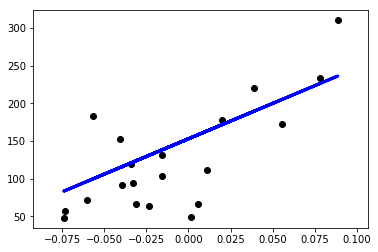

In [32]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, predictions, color='blue',
         linewidth=3)

plt.show()